# 第9部　一般化線形モデル

## 2章　ロジスティック回帰

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：データの読み込みと可視化

In [3]:
# データの読み込み
test_result = pd.read_csv('9-2-1-logistic-regression.csv')
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


<AxesSubplot:xlabel='hours', ylabel='result'>

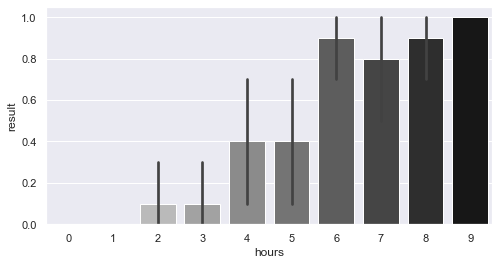

In [4]:
# データの図示
sns.barplot(x='hours',y='result', 
            data=test_result, palette='gray_r')

In [5]:
# 勉強時間ごとの合格率
print(test_result.groupby('hours').mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 実装：ロジスティック回帰

In [6]:
# モデル化
mod_glm = smf.glm(formula='result ~ hours', 
                  data=test_result, 
                  family=sm.families.Binomial()).fit()

In [7]:
# 参考：リンク関数を指定する(書籍には載っていないコードです)
logistic_reg = smf.glm(formula = 'result ~ hours', 
                       data = test_result, 
                       family=sm.families.Binomial(link=sm.families.links.logit())).fit()

### 実装：ロジスティック回帰の結果の出力

In [8]:
# 結果の出力
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 22 May 2022   Deviance:                       68.028
Time:                        15:49:58   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 実装：ロジスティック回帰のモデル選択

In [9]:
# Nullモデル
mod_glm_null = smf.glm(
    'result ~ 1', data=test_result, 
    family=sm.families.Binomial()).fit()

In [10]:
# AICの比較
print('Nullモデル　　：', round(mod_glm_null.aic, 3))
print('変数入りモデル：', round(mod_glm.aic, 3))

Nullモデル　　： 139.989
変数入りモデル： 72.028


### 実装：ロジスティック回帰による予測

#### predict関数を使った予測

In [11]:
# 0~9まで1ずつ増える等差数列
exp_val = pd.DataFrame({
    'hours': np.arange(0, 10, 1)
})
# 成功確率の予測値
pred = mod_glm.predict(exp_val)
pred

0    0.010
1    0.026
2    0.063
3    0.145
4    0.301
5    0.521
6    0.734
7    0.875
8    0.946
9    0.978
dtype: float64

#### 推定された係数を使った予測

In [12]:
beta0 = mod_glm.params[0]
beta1 = mod_glm.params[1]
hour = 9

round(1 / (1 + np.exp(-(beta0 + beta1 * hour))), 3)

0.978

### 実装：ロジスティック回帰の回帰曲線の図示

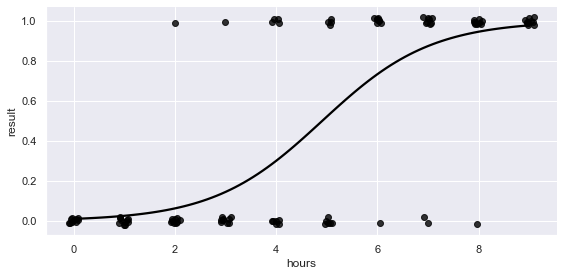

In [13]:
# lmplotでロジスティック回帰曲線を図示する
sns.lmplot(x='hours', y='result',
           data=test_result, logistic=True,
           scatter_kws = {'color': 'black'},
           line_kws    = {'color': 'black'},
           x_jitter=0.1, y_jitter=0.02,
           ci=None, height=4, aspect=2)

### 実装：ロジスティック回帰の係数とオッズ比の関係

In [14]:
# 勉強時間が1時間である場合の合格率
exp_val_1 = pd.DataFrame({'hours': [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 勉強時間が2時間である場合の合格率
exp_val_2 = pd.DataFrame({'hours': [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [15]:
# オッズ
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 対数オッズ比
log_odds_ratio = np.log(odds_2 / odds_1)
log_odds_ratio

0    0.929
dtype: float64

In [16]:
# 係数
round(mod_glm.params['hours'], 3)

0.929

In [17]:
# 補足：オッズ比に戻す
round(np.exp(mod_glm.params['hours']), 3)

2.532